# **Proyecto Final Transformers y GPT-2: Modelo gpt2-small-diputados**

### Universidad CENFOTEC

### Maestría en Ingeniería del Software con énfasis en Inteligencia Artificial Aplicada

### Aplicaciones de la Inteligencia Artificial

## Autores:

* Jose Alberto Aguilar
* Jean Carlo Alvarado
* Santiago Mejía



El presente modelo _gpt2-diputados-small_ fue entrenado para la tarea de generación de texto. Para el _fine tuning_ del modelo se utilizaron los textos de las intervenciones de los diputados del periodo 2018-2022 de la Asamblea Legislativa de Costa Rica. En total se utilizaron 2246 intervenciones que en total equivalen a 44mb de texto. Estos se descargaron a inicios de mayo del año 2022 de la página [Diputados y Diputadas](http://www.asamblea.go.cr/Diputados/SitePages/Inicio.aspx) del sitio oficial de la Asamblea Legislativa. Para su descarga y procesamiento se utilizaron varios programas de Python, cuyo código fuente está disponible en [Github](https://github.com/joaguilar/asamblea-scrapper).

Para iniciar, copiamos los archivos necesarios de google drive e importamos las bibliotecas que vamos a utilizar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -v '/content/drive/MyDrive/data/eswiki/all_texts_eswiki.csv' '/content/sample_data/' 
!cp -v '/content/drive/MyDrive/data/eswiki/all_texts_eswiki.txt' '/content/sample_data/' 
!cp -v '/content/drive/MyDrive/data/eswiki/diputados.csv' '/content/sample_data/' 
!cp -v '/content/drive/MyDrive/data/all_text.txt' '/content/sample_data/' 
!cp -rv '/content/drive/MyDrive/data/eswiki/modelo_diputados/' '/content/sample_data/' 

'/content/drive/MyDrive/data/eswiki/all_texts_eswiki.csv' -> '/content/sample_data/all_texts_eswiki.csv'
'/content/drive/MyDrive/data/eswiki/all_texts_eswiki.txt' -> '/content/sample_data/all_texts_eswiki.txt'
'/content/drive/MyDrive/data/eswiki/diputados.csv' -> '/content/sample_data/diputados.csv'
'/content/drive/MyDrive/data/all_text.txt' -> '/content/sample_data/all_text.txt'
'/content/drive/MyDrive/data/eswiki/modelo_diputados/' -> '/content/sample_data/modelo_diputados'
'/content/drive/MyDrive/data/eswiki/modelo_diputados/GPT2_dp_1epoch.pth' -> '/content/sample_data/modelo_diputados/GPT2_dp_1epoch.pth'
'/content/drive/MyDrive/data/eswiki/modelo_diputados/GPT2_dp_2epoch.pth' -> '/content/sample_data/modelo_diputados/GPT2_dp_2epoch.pth'
'/content/drive/MyDrive/data/eswiki/modelo_diputados/GPT2_dp_3epoch.pth' -> '/content/sample_data/modelo_diputados/GPT2_dp_3epoch.pth'
'/content/drive/MyDrive/data/eswiki/modelo_diputados/GPT2_dp_5epoch.pth' -> '/content/sample_data/modelo_diputados

In [ ]:
!ls -lasrt '/content/drive/MyDrive/data/eswiki/modelo_diputados/'

total 4554349
 806460 -rw------- 1 root root  825814745 Aug 24 03:45 GPT2_dp_1epoch.pth
1027878 -rw------- 1 root root 1052546969 Aug 24 04:28 GPT2_dp_2epoch.pth
1249297 -rw------- 1 root root 1279279257 Aug 24 05:03 GPT2_dp_3epoch.pth
1470715 -rw------- 1 root root 1506011545 Aug 24 06:26 GPT2_dp_5epoch.pth


In [ ]:
# drive.flush_and_unmount()
!ls -lasrt '/content/sample_data'

total 375684
    4 -rwxr-xr-x 1 root root      930 Jan  1  2000 README.md
    4 -rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
 1668 -rw-r--r-- 1 root root  1706430 Aug 15 13:44 california_housing_train.csv
  296 -rw-r--r-- 1 root root   301141 Aug 15 13:44 california_housing_test.csv
35668 -rw-r--r-- 1 root root 36523880 Aug 15 13:44 mnist_train_small.csv
17864 -rw-r--r-- 1 root root 18289443 Aug 15 13:44 mnist_test.csv
    8 drwxr-xr-x 1 root root     4096 Aug 25 03:02 ..
93260 -rw------- 1 root root 95492565 Aug 25 03:02 all_texts_eswiki.csv
92988 -rw------- 1 root root 95213317 Aug 25 03:02 all_texts_eswiki.txt
89088 -rw------- 1 root root 91224938 Aug 25 03:02 diputados.csv
    4 drwxr-xr-x 1 root root     4096 Aug 25 03:02 .
44832 -rw------- 1 root root 45904926 Aug 25 03:02 all_text.txt


**--------------------------------------------------------------------------------**

Se cargan las libreria a utilizar para este caso se descargan la librerias:

- Transformer
- Tokenizers
- Torch

Una vez descargadas estas librerias se crea una instancia de las mismas, las cuales utilizaran el pequeño tranformer de gtp2-smal-spanish, esto ya que el texto con el que se va a trabajar y se desea generar es en español.

Ademas de este se define que se utilice la GPU como el dispositivo principal para correr y entrenar el modelo a crear.

In [ ]:
# !pip install fastai2
!pip install transformers
!pip install tokenizers
# !pip install fastai

#import torch

from transformers import AutoTokenizer, AutoModelForCausalLM


tokenizer = AutoTokenizer.from_pretrained("datificate/gpt2-small-spanish")

model = AutoModelForCausalLM.from_pretrained("datificate/gpt2-small-spanish")
import torch
gpu = 0
torch.cuda.set_device(gpu)
print(f'cuda device: {torch.cuda.current_device()}')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
     |████████████████████████████████| 120 kB 33.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


cuda device: 0


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

from fastai.text.all import *

In [ ]:
# import tokenizers and transformers
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
from tokenizers import ByteLevelBPETokenizer
# setup new path_data and create the lang folder
data_path = '/content/sample_data/all_text.txt'
path_data = '/content/sample_data'

import os

In [ ]:
lang = 'es'
# name = f'{lang}wiki'
name = 'all_text.txt'
data_path = '/content/sample_data'
path_data = data_path+'/'+name
# os.makedirs(path_data,exist_ok=True)


Para el entrenamiento del modelo, nos vamos a basar en el modelo [datificate/gpt2-small-spanish](https://huggingface.co/datificate/gpt2-small-spanish) de Hugging Face, Este modelo se entrenó utilizando Wikipedia en español  por medio de _Transfer Learning and Fine Tuning_.

Este proyecto se basó en la documentación de la creación del modelo [GPorTuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese). Al igual que ese modelo, en el presente se hace un _fine tuning_ de un modelo basado en GPT2-small (el _gpt-small-spanish_ mencionado anteriormente). El _fine tuning_ es la práctica de entrenar aún más un modelo de lenguaje basado en transformers utilizando un conjunto de datos específico para una tarea o caso de uso particular.



# Entrenamiento del modelo gpt-diputados-small

## Tokenizer

El primer paso del _fine tuning_ de un transformer es generar la tokenización. Las bibliotecas de fastai proveen un mecanismo fácil y rápido para esto. Nótese que para este tipo de entrenamientos se utiliza lo que se conoce como un [Byte-Level Byte-Pair Encoding Tokenizer](https://arxiv.org/pdf/1909.03341.pdf), que trabaja a nivel de Bytes en vez de palabras propiamente - esto representa el texto a nivel de bytes y usa un conjunto de 256 bytes como el vocabulario, haciendolo más compacto y muy importante para nuestro caso de uso agnóstico al idioma.

Nota: El texto completo de las intervenciones de los diputados se encuentra en el archivo "all_text.txt".

Los pasos para hacer _fine tuning_ de un BPE Tokenizer, a grandes rasgos, para nuestro corpus, son los siguientes, los cuales posteriormente se pueden observar en el código:

1. Obtener un Tokenizer pre-entrenado - en este caso utilizamos el tokenizer incluido con el modelo _gpt2_ que es la base de los tokenizers de los modelos 
   1. Nótese que este tokenizer va a ser la base del tokenizer de nuestro modelo
   2. La forma de aprovechar este tokenizer es es cambiar la matriz de embeddings del vocabulario del tokenizer (manteniendo tokens en común), tal y como se describe en la generación de [GPorTuguese-2](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787)
2. Entrenar un _Byte-Pair Encoding Tokenizer_ utilizando el texto del corpus. En nuestro caso es el texto de las intervenciones de los diputados
   1. Esto se describe en detalle en el [Tutorial de Hugging Face](https://huggingface.co/course/chapter6/5)
   2. Algo importante a destacara es que se mantiene el tamaño del vocabulario del tokenizer original. Esto debido a que este vocabulario básicamente representa el tamaño de los embeddings entonces es necesario para poder combinar ambos Tokenizers.
3. Una vez entrenado el tokenizer en el texto de los diputados, importar los archivos de configuración en el Tokenizer pre-entrenado, reemplazando la matriz de embeddings (como se mencionó anteriormente)
4. Guardar el nuevo Tokenizer entrenado para poder utilizarlo posteriormente

El siguiente código ejecuta lo anterior:

In [ ]:
# Obtener un Tokenizer pre-entrenado
from tokenizers import ByteLevelBPETokenizer

pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)
tokenizer_en.pad_token = tokenizer_en.eos_token
# Entrenar un _Byte-Pair Encoding Tokenizer_ utilizando el texto 
#del corpus. En nuestro caso es el texto de las intervenciones 
#de los diputados
# se mantiene el tamaño del vocabulario del tokenizer original
ByteLevelBPE_tokenizer_es_vocab_size = tokenizer_en.vocab_size
ByteLevelBPE_tokenizer_es_vocab_size
# Utilizamos el Byte-Level Byte-Pair Encoding Tokenizer de la
#biblioteca de Hugging Face
from tokenizers import ByteLevelBPETokenizer
ByteLevelBPE_tokenizer_es = ByteLevelBPETokenizer()
paths = ['/content/sample_data/all_text.txt']
# Entrenamos el tokenizer nuevo de nuestro texto/modelo
ByteLevelBPE_tokenizer_es.train(files=paths,
                    vocab_size=ByteLevelBPE_tokenizer_es_vocab_size, 
                    min_frequency=2, 
                    special_tokens=["<|endoftext|>"])
# Requerido para mantener la compatibilidad con el modelo original
ByteLevelBPE_tokenizer_es.enable_truncation(max_length=1024)
#Guardamos el tokenizer
ByteLevelBPE_tokenizer_es_rep = 'ByteLevelBPE_tokenizer_es'
path_to_ByteLevelBPE_tokenizer_es_rep = data_path + '/' + ByteLevelBPE_tokenizer_es_rep
print(path_to_ByteLevelBPE_tokenizer_es_rep)
if not os.path.exists(path_to_ByteLevelBPE_tokenizer_es_rep):
    os.makedirs(path_to_ByteLevelBPE_tokenizer_es_rep, exist_ok=True)
ByteLevelBPE_tokenizer_es.save_model(str(path_to_ByteLevelBPE_tokenizer_es_rep))
# Cargamos el tokenizer como un tokenizer de GPT2
tokenizer_es = GPT2TokenizerFast.from_pretrained(
    str(path_to_ByteLevelBPE_tokenizer_es_rep), 
    pad_token='<|endoftext|>')
tokenizer_es.model_max_length = 1024


/content/sample_data/ByteLevelBPE_tokenizer_es


El siguiente paso ejecuta el paso de "mezclar" los dos tokenizers, manteniendo los pesos de los 
embeddings en común, tal y como se describe en la documentación de [Transformers de fastai](https://docs.fast.ai/39_tutorial.transformers.html) y en la generación de [GPorTuguese-2](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787)

Esta matriz es el objeto `wte`, el cual contiene los vectores de los embeddings del tokenizer.

Nótese que modificamos el método `encode` del `TransformerTokenizer` para que no realice ningún post-procesamiento (tal y como lo recomienda la documentación), y el método decodes retorna un objeto de fastai que permite que se utilicen métodos de fastai más adelante con el Tokenizer. [Referencia](https://docs.fast.ai/39_tutorial.transformers.html)

In [ ]:
# Creamos la clase del transformer tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))
# Obtenemos los dos tokenizers
tokenizer_fastai_en = TransformersTokenizer(tokenizer_en)
tokenizer_fastai_es = TransformersTokenizer(tokenizer_es)
# Cambiamos los embeddings del modelo GPT-2 pre entrenado para usar el 
#vocabulario de "diputados"
# Obtenemos los pesos anteriores
old_wgts = model.transformer.get_input_embeddings().weight.clone().detach()
# Este es un truco documentado en la en la generación de GPorTuguese-2, 
# donde los embeddings de tokens del nuevo vocabulario que no estan en el 
# vocabulario original se les asigna un vector promedio de los embeddings.
wgts_m = old_wgts.mean(0)
# Creamos el nuevo vocabulario
new_vocab_size = tokenizer_fastai_es.tokenizer.vocab_size
new_wgts = old_wgts.new_zeros(new_vocab_size,old_wgts.size(1))
# Crear el nuevo vocabulario manteniendo los vectores de embeddings
# presentes en ambos. Los embeddings de tokens del nuevo vocabulario que no 
# estan en el 
# vocabulario original se les asigna un vector promedio de los embeddings.
old_vocab = tokenizer_fastai_en.tokenizer.get_vocab()
new_vocab = tokenizer_fastai_es.tokenizer.get_vocab()
same_tokens_list = list()
different_tokens_list = list()
    
for w,idx_new in new_vocab.items():    
    idx_old = old_vocab.get(w, -1)
    if idx_old>=0:
        new_wgts[idx_new] = old_wgts[idx_old]
        same_tokens_list.append((w,idx_new))
    else:
        new_wgts[idx_new] = wgts_m
        different_tokens_list.append((w,idx_new))
# Creamos la nueva matriz de embeddings
new_wte = nn.Embedding(new_vocab_size,old_wgts.size(1))
new_wte.weight.data = new_wgts
model.transformer.set_input_embeddings(new_wte)

torch.save(new_wgts, data_path+'/'+'new_wte_wgts.dp')
# Salvar las matrices de tokens preexistentes y de los nuevos
torch.save(same_tokens_list, data_path+'/'+'same_tokens_list.dp')
torch.save(different_tokens_list, data_path+'/'+'different_tokens_list.dp')
# Guardar los pesos de los embeddings en el modelo
model.lm_head.weight = model.transformer.wte.weight

Mostramos el modelo.

In [ ]:
model.lm_head

Linear(in_features=768, out_features=50257, bias=False)

En el siguiente paso cargamos las intervenciones de los diputados en formato csv, con una intervención por fila (solamente se tiene un campo, 'text').

Esto se utilizará para el entrenamiento del modelo.

Nota: Con el fin de poder utilizar el GPU T4 de Colab, fue necesario reducir el número de textos utilizados a solamente 2000. De lo contrario la máquina tenía errores por quedarse sin memoria.

In [ ]:
lang = 'es'
fname = f'all_texts_{lang}wiki.csv'
# df = pd.read_csv('/content/sample_data/all_texts_eswiki.csv')
df = pd.read_csv('/content/sample_data/diputados.csv')
df.dropna()
print(len(df))
dfl = df[0:2000]['text'].tolist()
print(len(dfl))


2247
2000


A continuación se definen los parametros de los conjuntos de entrenamiento. Usamos una división 80/20 de entrenamiento/prueba.

Nota: Basado en la [documentación de fastai](https://docs.fast.ai/39_tutorial.transformers.html), se utilizó un [TfmdLists](https://docs.fast.ai/data.core.html#tfmdlists). Esta clase tiene la caracteristica que puede manejar tanto el conjunto de entrenamiento como el de prueba. En la variable splits se le dice cuales elementos del arreglo de textos son de cada conjunto.

In [ ]:
num = int(0.8*len(df)) # 80% para entrenamiento
idxs = np.random.randint(0, len(dfl), len(dfl))
idxs_train = idxs[:num]
idxs_val = idxs[num:]
# We gather all texts in one numpy array 
# (since it will be easier to use this way with fastai)
# all_texts = np.concatenate([dfl.iloc[idxs_train], dfl.iloc[idxs_val]])
all_texts = np.concatenate([dfl[:num],dfl[num:]])
# all_texts = np.concatenate([df.iloc[idxs_train].text.astype(str).values.to_list(), 
#                             df.iloc[idxs_val].text.astype(str).values.to_list()])
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer_es), splits=splits, dl_type=LMDataLoader)

Token indices sequence length is longer than the specified maximum sequence length for this model (3317 > 1024). Running this sequence through the model will result in indexing errors


Parámetros para el entrenamiento.
Utilizamos:


*   Batch Size: 4. Números superiores causaban que la GPU se quedara sin memoria
*   Tamaño de Sequencia de 1024. En este caso la GPU soportó esta secuencia y es la que utiliza GPT2 por defecto

Adicionalmente se utiliza un objeto [Dataloader](https://docs.fast.ai/data.core.html#dataloaders), el cual carga los datos de prueba y validación.



In [ ]:
bs,sl = 4,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

Podemos pedirle al dataloader que nos muestre los textos a utilizar. El de la derecha está corrida una posición para su uso en el entrenamiento y validación.

In [ ]:
# df.head()
# all_texts[0]
# splits[1]
dls.show_batch(max_n=5)


,text,text_
0,"\n\nActa de la sesión plenaria ordinaria N\n.º\n 76\nMiércoles 10 de octubre de 2018\nSegundo período de sesiones ordinarias\nPrimera legislatura\nDiputado Roberto Thompson Chacón:\nMuchas gracias, señora presidenta, compañeras y compañeros, muy buenas tardes para todos los que nos escuchan y nos ven.\nYo quisiera referirme hoy al tema de la construcción de las obras en el campus de la Universidad Nacional, que junto con varios compañeros y compañeras de esta fracción hemos estado denunciando desde el día de ayer en que apareció el famoso cartel de adjudicación de la licitación.\nYo particularmente me siento orgulloso de ser graduado de la Universidad de Costa Rica, donde pasé seis años estudiando y tengo un título de licenciado en Derecho de la Universidad de Costa Rica. Y me siento, me siento, diputado Cruickshank, igual que usted, profundamente orgulloso de llevar ese título y mostrarlo.\nDefensor por supuesto de la educación pública superior, fui también durante el 2006 al 2010","\nActa de la sesión plenaria ordinaria N\n.º\n 76\nMiércoles 10 de octubre de 2018\nSegundo período de sesiones ordinarias\nPrimera legislatura\nDiputado Roberto Thompson Chacón:\nMuchas gracias, señora presidenta, compañeras y compañeros, muy buenas tardes para todos los que nos escuchan y nos ven.\nYo quisiera referirme hoy al tema de la construcción de las obras en el campus de la Universidad Nacional, que junto con varios compañeros y compañeras de esta fracción hemos estado denunciando desde el día de ayer en que apareció el famoso cartel de adjudicación de la licitación.\nYo particularmente me siento orgulloso de ser graduado de la Universidad de Costa Rica, donde pasé seis años estudiando y tengo un título de licenciado en Derecho de la Universidad de Costa Rica. Y me siento, me siento, diputado Cruickshank, igual que usted, profundamente orgulloso de llevar ese título y mostrarlo.\nDefensor por supuesto de la educación pública superior, fui también durante el 2006 al 2010"
1,"se le apuntó en ese momento, al modelo de desarrollo cuyos réditos hemos disfrutado como costarricenses, y a ese modelo de convivencia social que nos da la opción permanente de contar con la vía institucional para resolver nuestras diferencias.Imaginémonos nosotros la importancia que replicó esto inclusive en esa transición democrática. Imaginemos nosotros la importancia que tuvo en los 40 las reformas sociales e institucionales que se llevaron a cabo bajo el liderazgo de Calderón Guardia y de Figueres Ferrer, que debían blindarse para garantizar esa transición democrática.Pues, compañeras y compañeros diputados, la abolición del Ejército le dio solidez e impidió que se revirtieran esas decisiones vitales.Sabidos de nuestros problemas económicos y sociales, que tenemos hoy y que se nos recuerdan constantemente, ya lo vimos en el último informe del Estado de la Nación 2019, donde nos habla de esa Costa Rica con una analogía de una caja de cartón,","le apuntó en ese momento, al modelo de desarrollo cuyos réditos hemos disfrutado como costarricenses, y a ese modelo de convivencia social que nos da la opción permanente de contar con la vía institucional para resolver nuestras diferencias.Imaginémonos nosotros la importancia que replicó esto inclusive en esa transición democrática. Imaginemos nosotros la importancia que tuvo en los 40 las reformas sociales e institucionales que se llevaron a cabo bajo el liderazgo de Calderón Guardia y de Figueres Ferrer, que debían blindarse para garantizar esa transición democrática.Pues, compañeras y compañeros diputados, la abolición del Ejército le dio solidez e impidió que se revirtieran esas decisiones vitales.Sabidos de nuestros problemas económicos y sociales, que tenemos hoy y que se nos recuerdan constantemente, ya lo vimos en el último informe del Estado de la Nación 2019, donde nos habla de esa Costa Rica con una analogía de una caja de cartón, frágil,"
2,"totalmente claro, pero en un comunicado que leímos nos d

El modelo HuggingFace retorna una tupla , con las predicciones reales y algunas activaciones adicionales. Para trabajar dentro del ciclo de entrenamiento fastai, necesitaremos eliminar las activaciones con el siguiente método: [Referencia](https://docs.fast.ai/39_tutorial.transformers.html#fine-tuning-the-model)

In [ ]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

Adicionalmente creamos multiples de las capas del modelo, 4 grupos especificamente, siguiendo las recomendaciones y explicaciones dadas en las siguientes referencias:


*   [GPorTuguese-2](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787)
*   [The Illustrated GPT-2 (Visualizing Transformer Language Models)](https://jalammar.github.io/illustrated-gpt2/)
*   [fastai Splitters, the Layer Groups, and how that relates to Transfer Learning](https://www.youtube.com/watch?v=UFS3FxsfIYA)

Estos grupos pueden tener diferentes _learning rates_. Sin embargo en este caso se utilizó solamente un learning rate como se elabora más adelante. Sin embargo el modelo queda listo para experimentos posteriores con estas variaciones.

Asimismo la principal razón de utilizar el splitter es para poder guardar progresivamente el modelo conforme se va entrenando en caso que se elimine la máquina de Google Colab.

In [ ]:
def splitter(model):
    
    modules = []
    for i in range(4): modules.append(model.transformer.h[i])
    groups = [nn.Sequential(*modules)]

    modules = []
    for i in range(4,8,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])

    modules = []
    for i in range(8,12,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    

    groups = L(groups +    [nn.Sequential(model.transformer.wte,model.transformer.wpe,model.transformer.ln_f)])
    
    return groups.map(params)

Ahora se crea el objeto [Learner](https://docs.fast.ai/learner.html#learner), que un objeto de fastai que agrupa y maneja los datos, el modelo, la función de pérdida y tiene la funcionalidad necesaria para entrenar el modelo. [Referencia](https://docs.fast.ai/39_tutorial.transformers.html#fine-tuning-the-model)

Posteriormente revisamos la configuración del learner y los grupos (Creados por el `splitter` anterior).

In [ ]:
%%time

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()

CPU times: user 1.09 ms, sys: 14 µs, total: 1.11 ms
Wall time: 1.11 ms


In [ ]:
%%time
# Check the number of parameters groups and the hyperparameters values
learn.create_opt()
print(f'number of parameters groups: {len(learn.opt.param_groups)}')

for i,h in enumerate(learn.opt.hypers):
    print(i,h)

number of parameters groups: 4
0 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
1 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
2 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
3 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
CPU times: user 23.1 ms, sys: 4 µs, total: 23.1 ms
Wall time: 64.2 ms


In [ ]:
%%time
learn.validate()


CPU times: user 1min 52s, sys: 4 s, total: 1min 56s
Wall time: 2min 1s


(#3) [11.191086769104004,0.027562391012907028,72481.5078125]

Con el siguiente comando podemos observar la configuración del modelo, las diferentes capas que lo componen.

Algo muy interesante a notar es como la primera capa es la de embeddings. Esto muestra la arquitectura del transformer, donde el primer componente es la matriz de atención, la cual se compone de vectores de embeddings como se puede observar.

Posteriormente vienen las demás capas con convoluciones.

In [ ]:
%%time 

learn.freeze()
learn.summary()

CPU times: user 763 ms, sys: 289 ms, total: 1.05 s
Wall time: 1.06 s


GPT2LMHeadModel (Input shape: 4 x 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 1024 x 768      
Embedding                                 38597376   True      
Embedding                                 786432     True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 3072     
Conv1D                                  

Algo muy útil de las bibliotecas de `fastai` es la posiblidad del modelo de determinar la tasa óptima de entrenamiento. Esto se hace con el método `lr_find()` del `Learner` como se describe en [Using the Learning Rate Finder (Beginner)](https://walkwithfastai.com/lr_finder)

CPU times: user 1min 27s, sys: 2.67 s, total: 1min 30s
Wall time: 1min 33s


SuggestedLRs(valley=0.0002754228771664202)

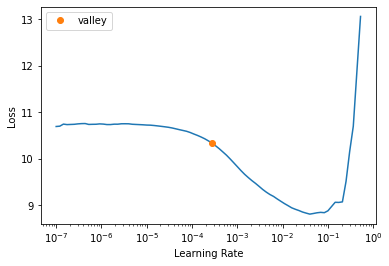

In [ ]:
%%time

torch.cuda.empty_cache()
learn.lr_find()


In [ ]:
Con esto fijamos la tasa de entrenamiento:

In [ ]:
learning_rate = 0.0002754228771664202

Y ejecutamos el entrenamiento.
Notese que el entrenamiento es por los grupos anteriormente mencionados.

El ciclo de entrenamiento del modelo consiste en congelar las capas de los demás grupos, y ejecutar un ciclo de entrenamiento. En nuestro caso ejecutamos un _epoch_ en cada ciclo.

In [ ]:
learn.fit_one_cycle(1, learning_rate)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.705489,4.566566,0.244189,96.213142,31:47


CPU times: user 84.5 ms, sys: 0 ns, total: 84.5 ms
Wall time: 87.8 ms


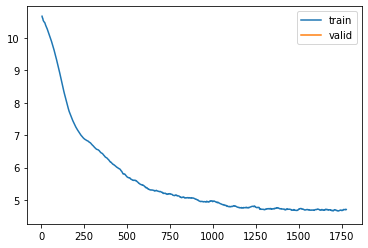

In [ ]:
%%time

learn.recorder.plot_loss()


Y salvamos el modelo en cada paso para poder recuperarlo en caso que falle o se suspenda la ejecución en Colab en algún momento.

In [ ]:
learn.save('/content/sample_data'+'/GPT2_dp_1epoch')
learn = learn.load('/content/sample_data'+'/GPT2_dp_1epoch')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive
cp: cannot stat '/content/sample_data/GPT2_es_1epoch_lr2e-3': No such file or directory


In [ ]:
!cp -v '/content/sample_data/GPT2_dp_1epoch.pth' '/content/drive/MyDrive/data/eswiki/modelo_diputados/'

'/content/sample_data/GPT2_dp_1epoch.pth' -> '/content/drive/MyDrive/data/eswiki/modelo_diputados/GPT2_dp_1epoch.pth'


In [ ]:
%%time

learn.freeze_to(-2)
learn.summary()

CPU times: user 652 ms, sys: 52 ms, total: 704 ms
Wall time: 749 ms


GPT2LMHeadModel (Input shape: 4 x 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 1024 x 768      
Embedding                                 38597376   True      
Embedding                                 786432     True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 3072     
Conv1D                                  

In [ ]:
%%time

learn.fit_one_cycle(1, learning_rate)


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.978230,3.883170,0.301234,48.577957,34:04


CPU times: user 31min 47s, sys: 1min 46s, total: 33min 33s
Wall time: 34min 4s


CPU times: user 61.1 ms, sys: 961 µs, total: 62.1 ms
Wall time: 66.8 ms


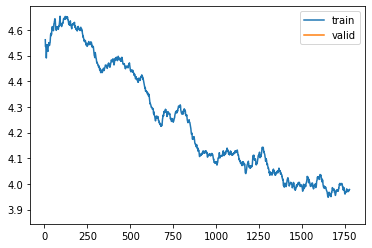

In [ ]:
%%time

learn.recorder.plot_loss()

In [ ]:
learn.save('/content/sample_data'+'/GPT2_dp_2epoch')
learn = learn.load('/content/sample_data'+'/GPT2_dp_2epoch')
!cp -v '/content/sample_data/GPT2_dp_2epoch.pth' '/content/drive/MyDrive/data/eswiki/modelo/'

'/content/sample_data/GPT2_dp_2epoch.pth' -> '/content/drive/MyDrive/data/eswiki/modelo/GPT2_dp_2epoch.pth'


In [ ]:
%%time

learn.freeze_to(-3)
learn.summary()

CPU times: user 613 ms, sys: 244 ms, total: 857 ms
Wall time: 919 ms


GPT2LMHeadModel (Input shape: 4 x 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 1024 x 768      
Embedding                                 38597376   True      
Embedding                                 786432     True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 3072     
Conv1D                                  

In [ ]:
%%time

learn.fit_one_cycle(1, learning_rate)


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.466196,3.407986,0.344134,30.204357,32:46


CPU times: user 32min 19s, sys: 24.1 s, total: 32min 43s
Wall time: 32min 46s


CPU times: user 54.3 ms, sys: 1.01 ms, total: 55.3 ms
Wall time: 58.5 ms


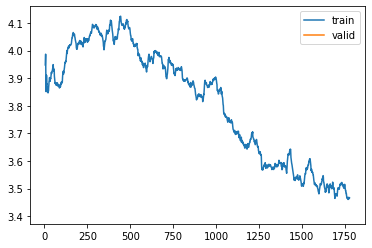

In [ ]:
%%time 

learn.recorder.plot_loss()


In [ ]:
learn.save('/content/sample_data'+'/GPT2_dp_3epoch')
learn = learn.load('/content/sample_data'+'/GPT2_dp_3epoch')
!cp -v '/content/sample_data/GPT2_dp_3epoch.pth' '/content/drive/MyDrive/data/eswiki/modelo_diputados/'

In [ ]:
%%time
learn.unfreeze()
learn.summary()

CPU times: user 432 ms, sys: 177 ms, total: 609 ms
Wall time: 688 ms


GPT2LMHeadModel (Input shape: 4 x 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 1024 x 768      
Embedding                                 38597376   True      
Embedding                                 786432     True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 2304     
Conv1D                                    1771776    True      
Conv1D                                    590592     True      
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     4 x 1024 x 3072     
Conv1D                                  

In [ ]:
%%time
  
learn.fit_one_cycle(2, learning_rate)


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.391202,3.255904,0.358088,25.943062,31:09
1,3.174295,3.069809,0.380279,21.537788,31:35


CPU times: user 1h 49s, sys: 1min 45s, total: 1h 2min 34s
Wall time: 1h 2min 45s


## Finalización del entrenamiento

Uan vez finalizado el entrenamiento podemos obtener varios detalles:

* El [_Perplexity_](https://huggingface.co/docs/transformers/perplexity) alcanzado fue de 21.53. Esto bajó de más de 72mil sin entrenamiento. De acuerdo con el [paper de GPT](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf), el mejor _perplexity_ que pudieron obtener fue de . Por lo que consideramos que es bastante bueno.
* Asimismo el modelo tiene una precisión (_accuracy_) de 38%. 
* Podemos ver como el modelo redujo la perdida de forma significativa - aunque empezo ya bajo dado que el punto de partida fue un modelo ya pre-entrenado en español.

CPU times: user 93.6 ms, sys: 1.05 ms, total: 94.7 ms
Wall time: 136 ms


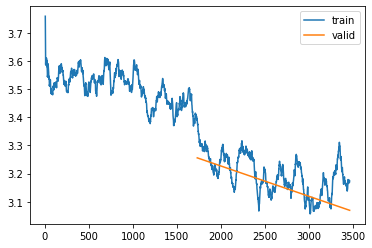

In [ ]:
%%time 
 
learn.recorder.plot_loss() 


In [ ]:
learn.save('/content/sample_data'+'/GPT2_dp_5epoch')
learn = learn.load('/content/sample_data'+'/GPT2_dp_5epoch')
!cp -v '/content/sample_data/GPT2_dp_5epoch.pth' '/content/drive/MyDrive/data/eswiki/modelo_diputados/'

'/content/sample_data/GPT2_dp_5epoch.pth' -> '/content/drive/MyDrive/data/eswiki/modelo_diputados/GPT2_dp_5epoch.pth'


In [ ]:
learn = learn.load('/content/sample_data/modelo_diputados/GPT2_dp_5epoch')

In [ ]:
model_diputados = learn.model
model_diputados_name = "gpt2-small-diputados"

In [ ]:
model_diputados.save_pretrained(model_diputados_name)
tokenizer_es.save_pretrained(model_diputados_name)

('gpt2-small-diputados/tokenizer_config.json',
 'gpt2-small-diputados/special_tokens_map.json',
 'gpt2-small-diputados/vocab.json',
 'gpt2-small-diputados/merges.txt',
 'gpt2-small-diputados/added_tokens.json',
 'gpt2-small-diputados/tokenizer.json')

In [ ]:
!cp -rv '/content/gpt-small-diputados/.' '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/'

'/content/gpt-small-diputados/./config.json' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./config.json'
'/content/gpt-small-diputados/./pytorch_model.bin' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./pytorch_model.bin'
'/content/gpt-small-diputados/./tokenizer_config.json' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./tokenizer_config.json'
'/content/gpt-small-diputados/./special_tokens_map.json' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./special_tokens_map.json'
'/content/gpt-small-diputados/./vocab.json' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./vocab.json'
'/content/gpt-small-diputados/./merges.txt' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./merges.txt'
'/content/gpt-small-diputados/./tokenizer.json' -> '/content/drive/MyDrive/data/eswiki/gpt2-small-diputados/./tokenizer.json'


# Generación de texto

Ahora vamos a generar texto.
Para generar texto, utilizamos el método llamado _Top-k sampling_, que fue el utilizado en el [paper original de GPT](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf).

Utilizaremos el valor por defecto de 50, pero como una variable para poder cambiarlo más adelante.

Este _top k_ lo que hace es que escoge un token como la siguiente palabra de una lista de los _k_ tokens con el mejor puntaje que genera el modelo. Mas información se puede encontrar en [Controlling Generation with top-k & top-p
](https://docs.cohere.ai/token-picking/)

In [ ]:
top_k = 50

El siguiente paso es proveer el "prompt" que va a utilizar el modelo.

Como funciona esto es que el modelo consume este "prompt" y genera tokens de acuerdo a la probabilidad que sea el token que sigue al prompt - y asi continuamente hasta alcanzar el numero de tokens que se le solicite (Estamos utilizando 400 tokens en este caso).

Para este experimento se utilizaron dos "prompts" estos fueron tomados de intervenciones de los diputados Rodrigo Arias y Paola Nájera, obtenidos del mismo sitio de la Asamblea Legislativa:

Los prompts son los siguientes:



> 'Nos enfrentamos a grandes y graves problemas que impactan nuestra realidad económica y social. Creo que ha llegado el momento de darle espacio a ese diálogo franco y productivo del que les hablé al inicio de este mandato. '
- Rodrigo Arias

> 'En las últimas semanas hemos visitado varias zonas de Cartago y hemos visto el lamentable, por no decir vergonzoso, estado de las carreteras. Hablo de gente que debe lidiar con presas eternas, agricultores que se juegan la vida para sacar sus productos, de niños que no pueden llegar a tiempo a sus escuelas. Hablo de personas que se sienten olvidadas por sus gobiernos desde hace muchos años atrás.'
- Paola Nájera



In [ ]:
# text = 'Nos enfrentamos a grandes y graves problemas que impactan nuestra realidad económica y social. Creo que ha llegado el momento de darle espacio a ese diálogo franco y productivo del que les hablé al inicio de este mandato. '
text = 'En las últimas semanas hemos visitado varias zonas de Cartago y hemos visto el lamentable, por no decir vergonzoso, estado de las carreteras. Hablo de gente que debe lidiar con presas eternas, agricultores que se juegan la vida para sacar sus productos, de niños que no pueden llegar a tiempo a sus escuelas. Hablo de personas que se sienten olvidadas por sus gobiernos desde hace muchos años atrás.'
input_ids = tokenizer_es.encode(text, return_tensors="pt").to('cuda')
max_length = input_ids.shape[1]

print(max_length)

75


Lo siguiente es poner el modelo en modo de evaluación en vez de entrenamiento:

In [ ]:
# put model into eval mode and on GPU
model_diputados.eval();
model_diputados.to('cuda');

Y generar el texto. En este caso generamos 10 textos

In [ ]:
%%time
textos = model_diputados.generate(input_ids, pad_token_id=50256,
                                   do_sample=True, 
                                   max_length=400, 
                                   min_length=400,
                                   top_k=50,
                                   num_return_sequences=10)



CPU times: user 5.88 s, sys: 15.6 ms, total: 5.89 s
Wall time: 6.72 s


Una vez generados se salvaron para poder revisarlos posteriormente.

In [ ]:
!mkdir textos

In [ ]:

for i, sample_output in enumerate(textos):
    salida_texto = tokenizer_es.decode(sample_output.tolist())
    print(">> Generated text {}\n\n{}".format(i+1, salida_texto))
    seq = random.randint(0,100000)
    with open('/content/textos/ejemplo_diputado_'+str(seq)+'.txt','w') as f:
      f.write(salida_texto)
    print('\n---')

>> Generated text 1

En las últimas semanas hemos visitado varias zonas de Cartago y hemos visto el lamentable, por no decir vergonzoso, estado de las carreteras. Hablo de gente que debe lidiar con presas eternas, agricultores que se juegan la vida para sacar sus productos, de niños que no pueden llegar a tiempo a sus escuelas. Hablo de personas que se sienten olvidadas por sus gobiernos desde hace muchos años atrás.  Yo voy a ver algunos casos, pero es la gran irresponsabilidad.Quiero también decir hoy que se trata de un hueco fiscal por el manejo de una mala Administración pública. La Administración pública en Costa Rica llegó a este nivel el veintidós por ciento del PIB. Y también, compañeros, yo considero que todos los recursos que ustedes representan son fundamentales para el 2022.¿Quién le está ofreciendo al fisco costarricense de dónde se invierten esas inversiones? Pues resulta que se le saca el dinero a la gente qué, porque ya no la hace…, ahora lo pagamos todas las propiedade

In [ ]:
!cp -rifv '/content/textos/.' '/content/drive/MyDrive/data/eswiki/textos_generados/'

cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_7822.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_314.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_8281.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_61301.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_16143.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_53372.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_69640.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_22599.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_12126.txt'? n
cp: overwrite '/content/drive/MyDrive/data/eswiki/textos_generados/./ejemplo_diputado_89443.txt'? n
cp: 

# Textos Generados Seleccionados

Los siguientes son textos escogidos de los generados por el modelo luego de su entrenamiento.

## Texto seleccionado 1

> Nos enfrentamos a grandes y graves problemas que impactan nuestra realidad económica y social. Creo que ha llegado el momento de darle espacio a ese diálogo franco y productivo del que les hablé al inicio de este mandato.  Pero es que el presidente don Carlos Alvarado tuvo un plan de recuperación económica fuerte de los diversos sectores golpeados, y el país tuvo que hablar de empleos, empleo y oportunidades de inversión pública.En este discurso del presidente dice que más de mil seiscientos veinticinco trabajadores de la zona más humilde, no le dice a todo el país que la mayor parte de las zonas francas en cuanto al fortalecimiento del sector privado no son pobres.  Eso no está así, eso no está tomando aquí.¿Por qué tenemos que hablar de aumentar el desempleo, a nivel de la baja de la zona a nivel mundial, a nivel interno de los distintos sectores?  Es un programa de radio que el ministro de Trabajo, por ejemplo, nos habla del plan de recuperación económica, de que el sector privado vaya a pagar más impuestos; por ejemplo, no tiene ni dónde producir y a veces la gente se mueve en un mercado regional.  Estamos hablando del sector privado y está hablando de la inversión pública.  Me preocupa que este último año que estamos de la misma Comisión de Asuntos Hacendarios y que hemos estado de acuerdo en que este país es una provincia ineficiente y que, de una u otra manera, nos llena de esperanza y sentimos de absoluta incertidumbre, por lo menos a lo largo de nuestro tiempo que hemos hecho. Pero realmente, no podemos pensar que el problema económico que se está viviendo cuando se toman decisiones por parte del Gobierno, y en realidad se está afectando al sector privado, y el Gobierno más responsable que el Gobierno no le permitió, y la Contraloría también, se sigue incumpliendo con las metas importantes.  En resumen, este plan de reactivación económica que viene haciendo a través de un Gobierno que prefiere generar crecimiento económico, que le permita tener recursos que no le pertenecen y que le permita que se atienda el desempleo, el desempleo de los sectores

## Texto seleccionado 2

> En las últimas semanas hemos visitado varias zonas de Cartago y hemos visto el lamentable, por no decir vergonzoso, estado de las carreteras. Hablo de gente que debe lidiar con presas eternas, agricultores que se juegan la vida para sacar sus productos, de niños que no pueden llegar a tiempo a sus escuelas. Hablo de personas que se sienten olvidadas por sus gobiernos desde hace muchos años atrás.  Y si les cuento, por qué yo siento, por qué por qué no, ustedes me han precedido, es el caso de la Zona Norte, es la Zona Norte donde no solo hay un solo proyecto de ley, sino también el cantón también está viendo cómo llegan agua, porque solo se maneja este cantón. Y ese proyecto de ley ya lo sabemos para el día de hoy.Hay un área de seguridad para poder hacer las obras porque el cantón está viendo cómo llegan el pueblo de Costa Rica, o se usa el MOPT, cómo llegan el MOPT.Así que necesitamos que se revisen ese proyecto y que, por favor, apoyen con este proyecto, no pongamos excusas para dar su voto a las Obras del Espíritu Santo, porque la ruta que se está haciendo para reactivar la economía se está haciendo.Muchas gracias, señor presidente.Sesión plenaria ordinaria N.º 35 del lunes 11 de agosto de 2021
Por el Orden
Diputado Erwen Masís Castro:Muchas gracias, señor presidente, señores diputados y diputadas.En este año, lo voy a votar al primer debate en primer debate y también a este segundo debate, porque yo hoy quiero comentarles que el diputado Víctor Morales hizo una intervención en la Comisión de Emergencia. Y quiero recordar que por ese informe, el informe de mayoría, nos presenta un primer informe sobre estos temas que hemos recibido en este Plenario.Quiero aclarar este informe, porque hay un punto importante para este Plenario legislativo de la Comisión Especial para el Control de Ingreso y Gasto Público.  ¿Qué pasa si esta comisión quiere abrir este Plenario?, ¿por qué es que esta comisión quiere abrir el Plenario a comisión general?

## Texto seleccionado 3

> En las últimas semanas hemos visitado varias zonas de Cartago y hemos visto el lamentable, por no decir vergonzoso, estado de las carreteras. Hablo de gente que debe lidiar con presas eternas, agricultores que se juegan la vida para sacar sus productos, de niños que no pueden llegar a tiempo a sus escuelas. Hablo de personas que se sienten olvidadas por sus gobiernos desde hace muchos años atrás.  Yo voy a ver algunos casos, pero es la gran irresponsabilidad.Quiero también decir hoy que se trata de un hueco fiscal por el manejo de una mala Administración pública. La Administración pública en Costa Rica llegó a este nivel el veintidós por ciento del PIB. Y también, compañeros, yo considero que todos los recursos que ustedes representan son fundamentales para el 2022.¿Quién le está ofreciendo al fisco costarricense de dónde se invierten esas inversiones? Pues resulta que se le saca el dinero a la gente qué, porque ya no la hace…, ahora lo pagamos todas las propiedades. 
Y ahí dice que no se necesita que esta Administración no se dé, entonces que no se dé y las cosas están dentro de un presupuesto que se saqueó por ahí. ¿Qué es lo que pasa con esto?

## Texto seleccionado 4

> Nos enfrentamos a grandes y graves problemas que impactan nuestra realidad económica y social. Creo que ha llegado el momento de darle espacio a ese diálogo franco y productivo del que les hablé al inicio de este mandato.  Hay que reconocer, hay que reconocer las ventajas del desarrollo económico y del empleo. Los invito a que nos unamos en conjunto, pero bueno, ahora que hacemos un esfuerzo con el presidente lo mejor.  De ser parte de esa agenda en donde se empieza el camino de poder seguir avanzando y que no necesariamente sea el resultado favorable de esa agenda con los diferentes sectores que se han manifestado y que puedan avanzar.  Esa es la realidad de este país.Por supuesto que he presentado dos mociones: no podemos, no solamente dejar de votar el proyecto, sino resolver la práctica parlamentaria y que podamos avanzar en una agenda de desarrollo económico, social y con la participación de las fracciones políticas representadas de cada uno de las fracciones representadas en este Plenario.
ACTA DE LA SESIÓN PLENARIA ORDINARIA N.º 50 Miércoles 06 de marzo de 2020
Control Político
Diputada María José Corrales Chacón:Gracias, presidente.Muy buenas tardes; buenas tardes, compañeras y compañeros; personas que nos están empujando este año con la aprobación de este proyecto, y en medio de una pandemia, con el fin de garantizar las condiciones de vida de su gente y así llevar su actividad económica a las personas, tanto también en la reactivación económica en medio de la crisis fiscal.Sin embargo, a pesar de que esto iba a hablar de un endeudamiento del Estado de un ocho por ciento, y de un monto superior a tres punto cuatro billones, el cual viene a afectar la deuda pública en este país, tanto en la que en su mayoría de costarricenses ya no hemos tenido ningún servicio permanente.Por lo tanto, si no me equivoco, creo que no solo el resultado de una aprobación de este proyecto, o la necesidad de un informe con el fin de garantizar más recursos, creo que sí hemos avanzado, hemos avanzado, pero cuando nos tocó a nosotros estar



# Mejoras a futuro

Al finalizar el proyecto podemos hacer las siguientes recomendaciones sobre mejoras para el modelo:

1. Utilizar el tokenizer del model _gpt2-small-spanish_ en vez del genérico _gpt_. Evaluar si esto afecta en algo la generación de texto
2. Realizar una limpieza de datos mas exhaustiva. Si bien en la limpieza de datos se eliminaron términos que correspondian a caracteres de control, asi como se procesó el texto para generar text plano, quedaron algunos detalles específicos de las intervenciones que consideramos podrían eliminarse de los texto para que el modelo solamente aprenda sobre las intervenciones de los diputados y no sobre la estructura del documento de intervenciones.
3. Utilizar diferentes _learning rates_ durante el entrenamiento como lo recomienda el tutorial de fastai y otra documentación consultada.